In [1]:
import pickle 
from datetime import datetime

debates_pkl = open('./debates.pkl','rb')
debates = pickle.load(debates_pkl)
debates_pkl.close()

In [2]:
dates = debates.keys()
pm_answers = dict()
loto_questions = dict()

for date in dates:
    pm_answers[date] = [x['content'] for x in debates[date]['contribs'].values() if x['speaker']=="The Prime Minister"]
    
pm_answers = {k:v for k,v in pm_answers.items() if datetime.strptime(k,"%Y-%m-%d") >= datetime.strptime("04-05-1979","%d-%m-%Y")}
pm_answers = {k:v for k,v in pm_answers.items() if datetime.strptime(k,"%Y-%m-%d") <= datetime.strptime("28-11-1990","%d-%m-%Y")}

In [3]:
from nltk.corpus import stopwords
import regex as re

stops = set(stopwords.words('english'))
stops = stops.union({'right','hon','friend','gentleman'})

def clean_text(text_list):
    text = ' '.join(text_list)
    
    return text
    
#     # remove newline and tab characters
#     text = text.replace("\n"," ")
#     text = text.replace("\t"," ")
    
#     # strip whitespace
#     text = text.strip()
    
#     # lowercase
#     text = text.lower()
    
#     token_pattern = re.compile(r"(?u)\b\w\w+\b")
#     text_list = token_pattern.findall(text)
    
#     text_list = [word for word in text_list if word not in stops]
    
#     return text_list

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_scores = dict()

for date,answer in pm_answers.items():
    
    senti_scores[date] = dict()
    
    sid = SentimentIntensityAnalyzer()
    
    cleaned_answer = clean_text(answer)
    ss = sid.polarity_scores(cleaned_answer)
    
    for k in sorted(ss):
        senti_scores[date][k] = ss[k]

In [6]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

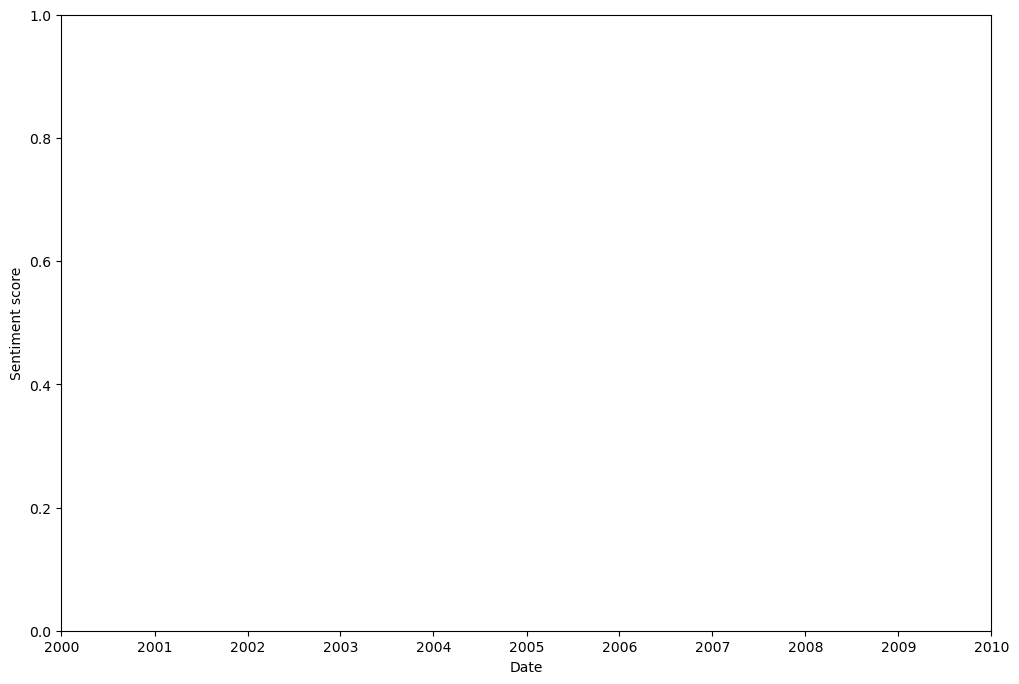

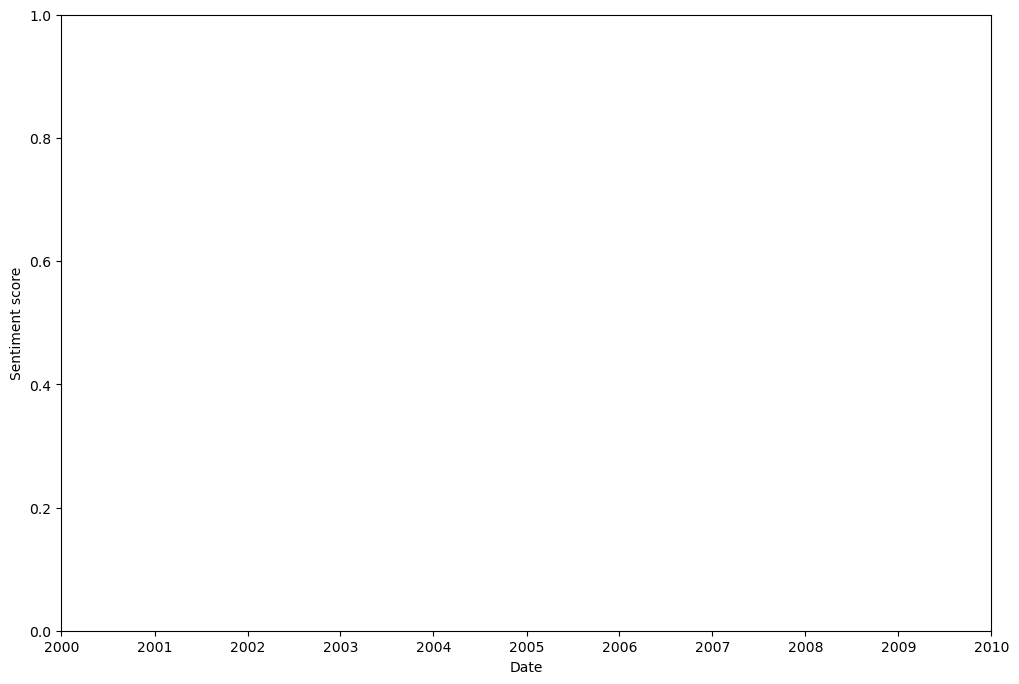

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_xlabel("Date")
ax.set_ylabel("Sentiment score")
ax.plot([datetime.strptime(dat,"%Y-%m-%d") for dat in senti_scores.keys()],
         [val['neg'] for val in senti_scores.values()],
         '.',lw=0,c='red',label = "Negative")
# plt.plot([datetime.strptime(dat,"%Y-%m-%d") for dat in senti_scores.keys()],
#          [val['neu'] for val in senti_scores.values()],
#          '.',lw=0,col='grey',label = "Neutral")
# plt.plot([datetime.strptime(dat,"%Y-%m-%d") for dat in senti_scores.keys()],
#          [val['pos'] for val in senti_scores.values()],
#          '.',lw=0,col='g',label = "Positive")
plt.show()